In [83]:
import torch;
from torchvision import datasets,transforms;
from torch import nn;
from torch import optim;

In [119]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]);
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download = True, train=True, transform=transform);
testset = datasets.MNIST('~/.pytorch/MNIST_data/',download = True,train=False,transform=transform);
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True);
testLoader = torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True);

In [117]:
model= nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1));

criterion = nn.CrossEntropyLoss();


In [87]:
images, labels = next(iter(trainloader));

images = images.view(images.shape[0],-1);

logits = model(images);

loss = criterion(logits,labels);


tensor(2.3235, grad_fn=<NllLossBackward>)


In [123]:
epochs = 5;

optimizer = optim.SGD(model.parameters(),lr = 0.03);

for e in range(epochs):
    curr_loss = 0;
    for images,labels in trainloader:
        optimizer.zero_grad();
        images = images.view(images.shape[0],-1);
        logits = model.forward(images);
        loss = criterion(logits,labels);
        loss.backward();
        optimizer.step();
        curr_loss+=loss.item();
    else:
        print(curr_loss/len(trainloader));

0.7821912694015483
0.28441430007550383
0.20410071232759242
0.1579611135154232
0.12791791484991052


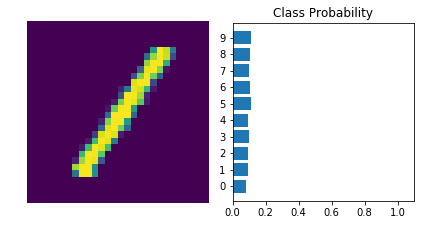

In [122]:
%matplotlib inline
import helper;

images,labels = next(iter(trainloader));
image = images[0].view(1,-1);

with torch.no_grad():
    output = model(image);
    
ps = torch.exp(output);

helper.view_classify(image.view(1,28,28),ps);
    

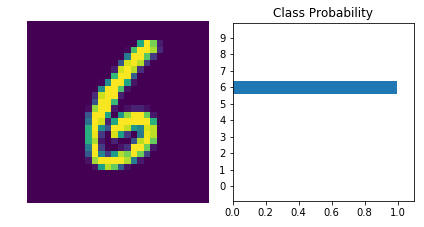

In [141]:
images,labels = next(iter(testLoader));

image = images[0].view(1,-1);
with torch.no_grad():
    output = model(image);

ps = torch.exp(output);

helper.view_classify(image.view(1,28,28),ps);